In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import sys
sys.path.append('../uscode')

import matplotlib.pyplot as plt
import itertools
import random
import numpy as np

In [24]:
import util
from uscode import USCode
from citation_network import CitationNetwork
from cluster import *

In [25]:
usc = USCode.from_json('../data/usc20191009-enhanced.json')
print(len(usc.titles()))

53


In [26]:
cn = CitationNetwork(usc)
print(len(cn.nodes))

64171


In [11]:
# title_ids = ['t17', 't32', 't39']
# section_lists = [list(usc.title(t).sections()) for t in title_ids]

# for sections in section_lists:
#     print(len(sections))

In [12]:
# def print_num_of_sinks(sections):
#     for sec in itertools.islice(sections, 5):
#         print('{}: {} sinks'.format(sec.id, len(cn.sinks_from(sec.id))))
#     print()

# for sections in section_lists:
#     print_num_of_sinks(sections)

In [13]:
# def print_clusters(clusters):
#     print('\n\n'.join('#{}: {}'.format(i, str(c)) for i, c in enumerate(clusters)))

# n_clusters = 5

# print("Vectorization Clustering:")
# print_clusters(vectorization_clustering.get_clusters(n_clusters))

# print('\n\n')
# print("Citation Clustering:")
# print_clusters(citation_clustering.get_clusters(n_clusters))

In [60]:
def show_dendrogram(sections):
    vectorization_clustering = Clustering(sections, vectorization_distance)
    sinks_clustering = Clustering(sections, CitationSinks(sections, cn).distance)
    citation_clustering = Clustering(sections, citation_distance)
    
    clusterings = [vectorization_clustering, sinks_clustering, citation_clustering]
    for clustering in clusterings:
        plt.figure(figsize=(40, 30))
        clustering.plot_dendrogram()
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)))

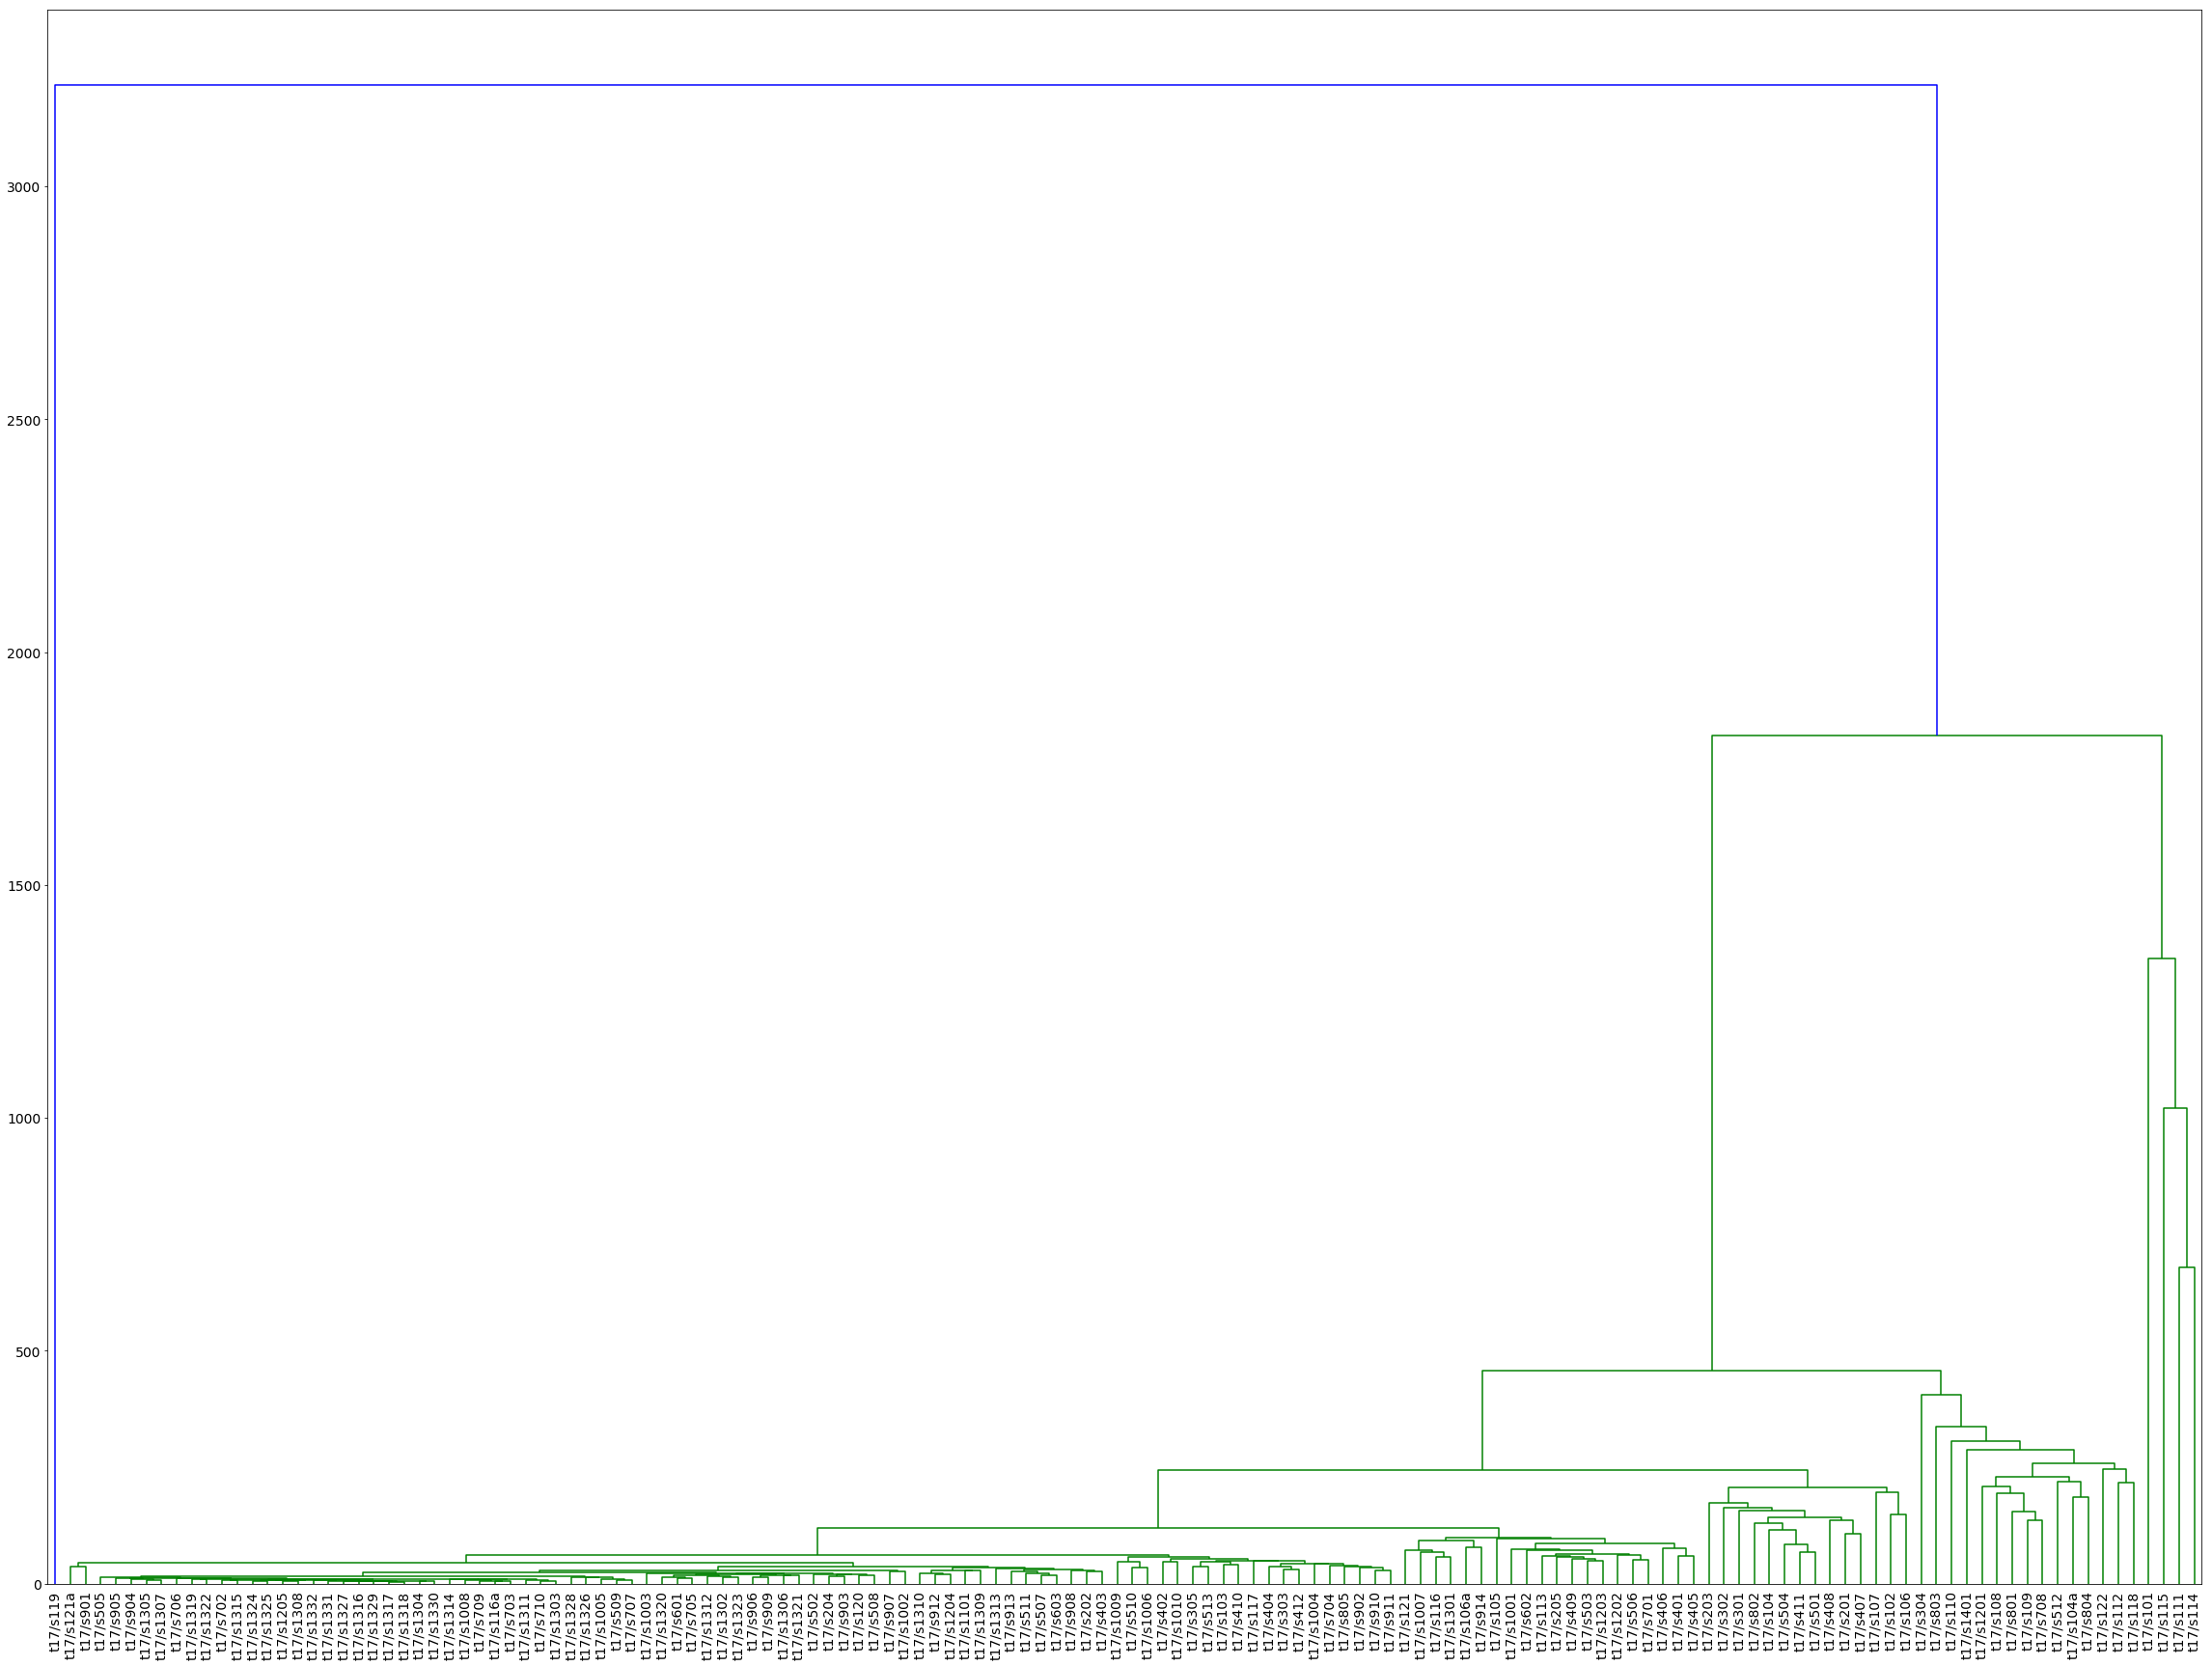

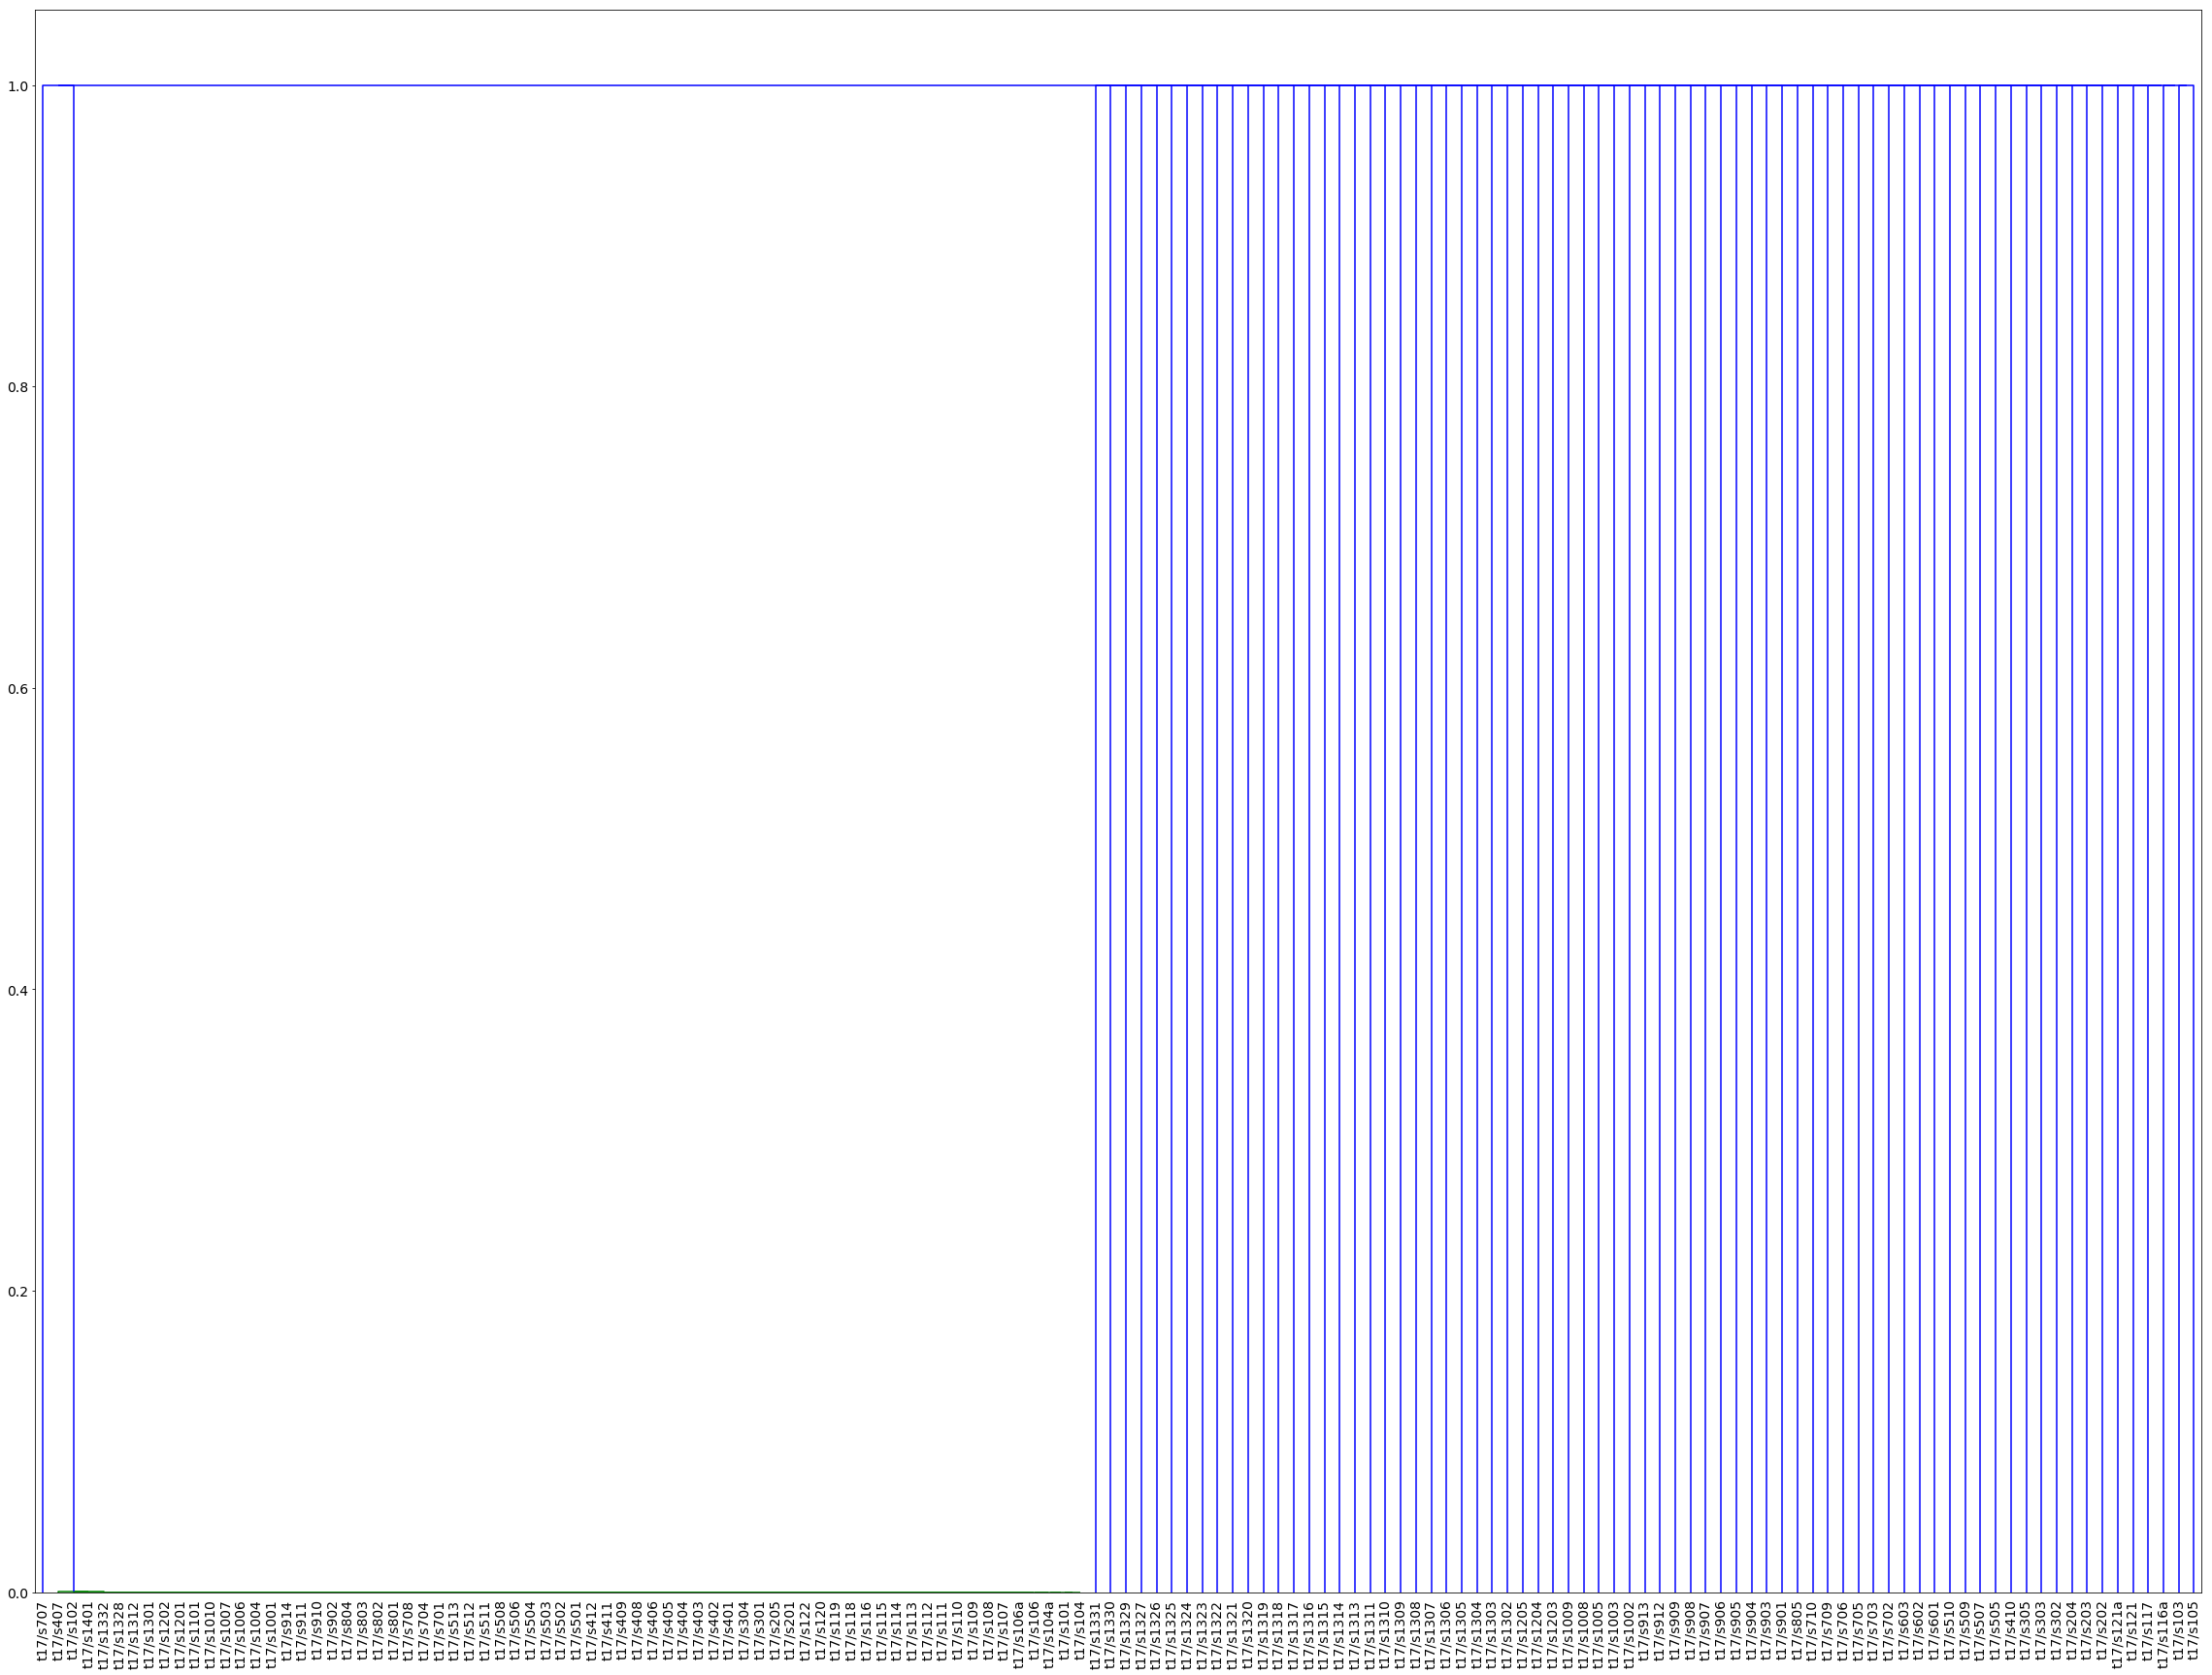

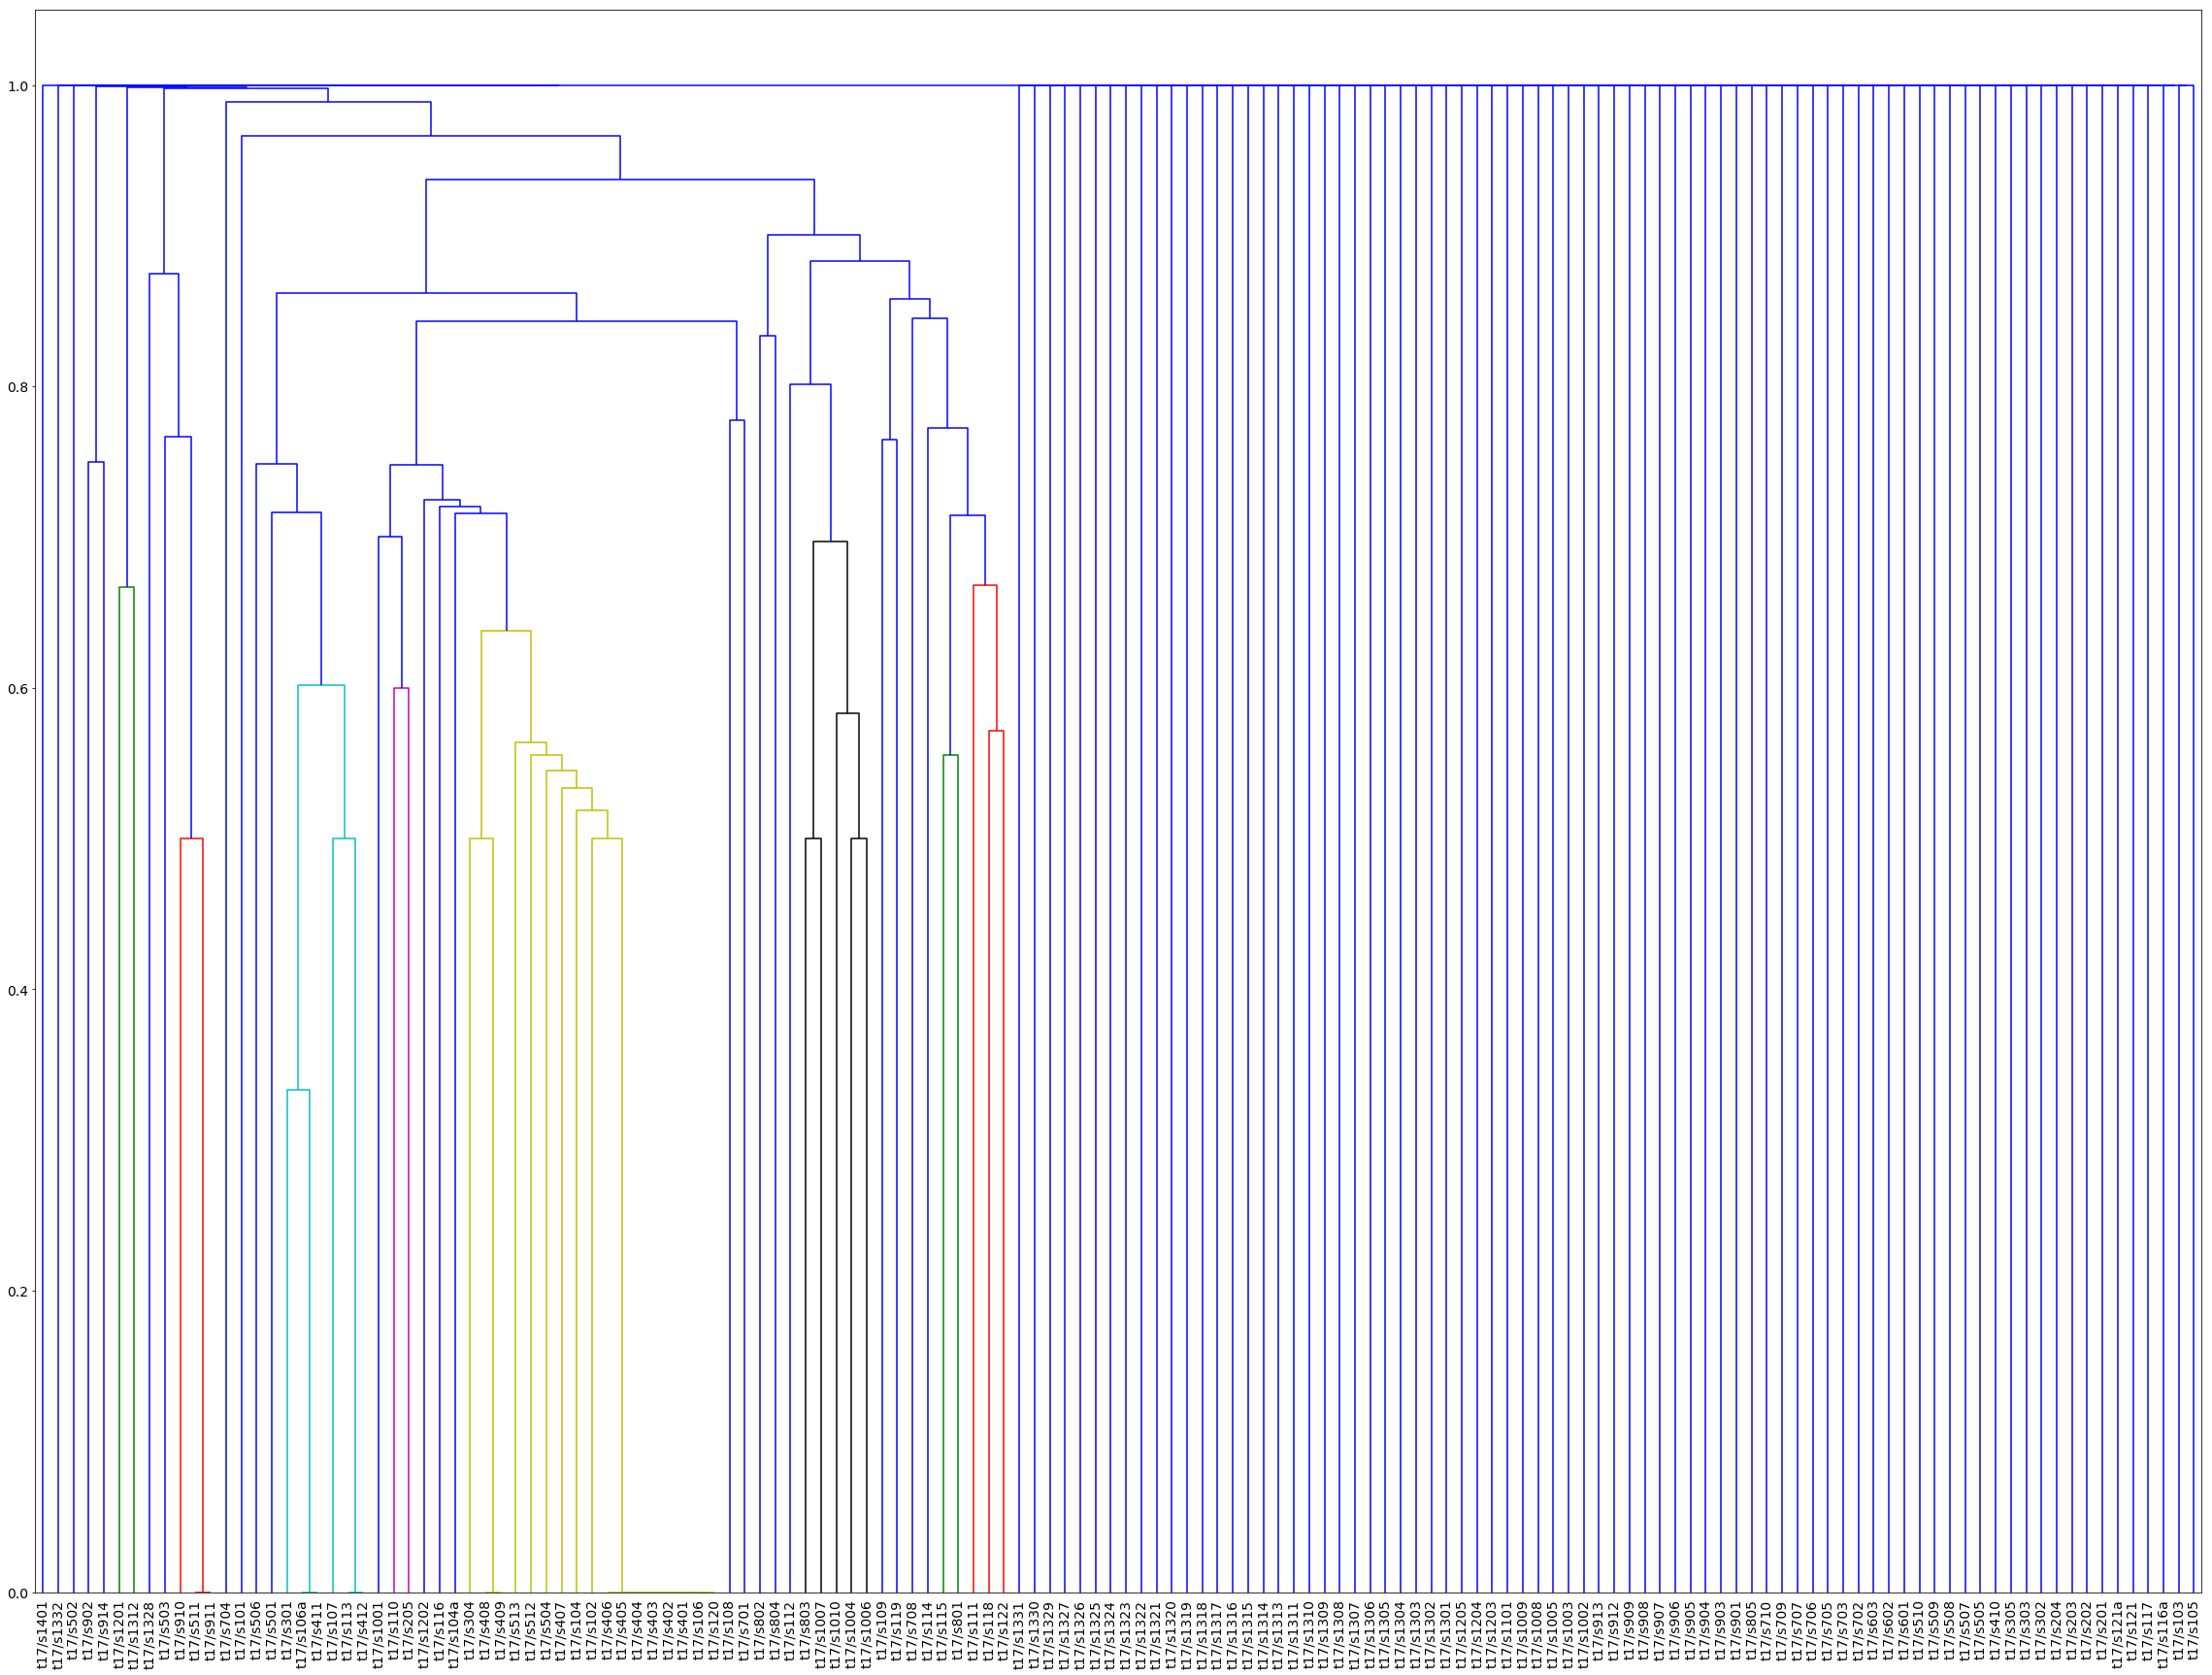

In [61]:
t = 't17'
show_dendrogram(usc.title(t).sections())

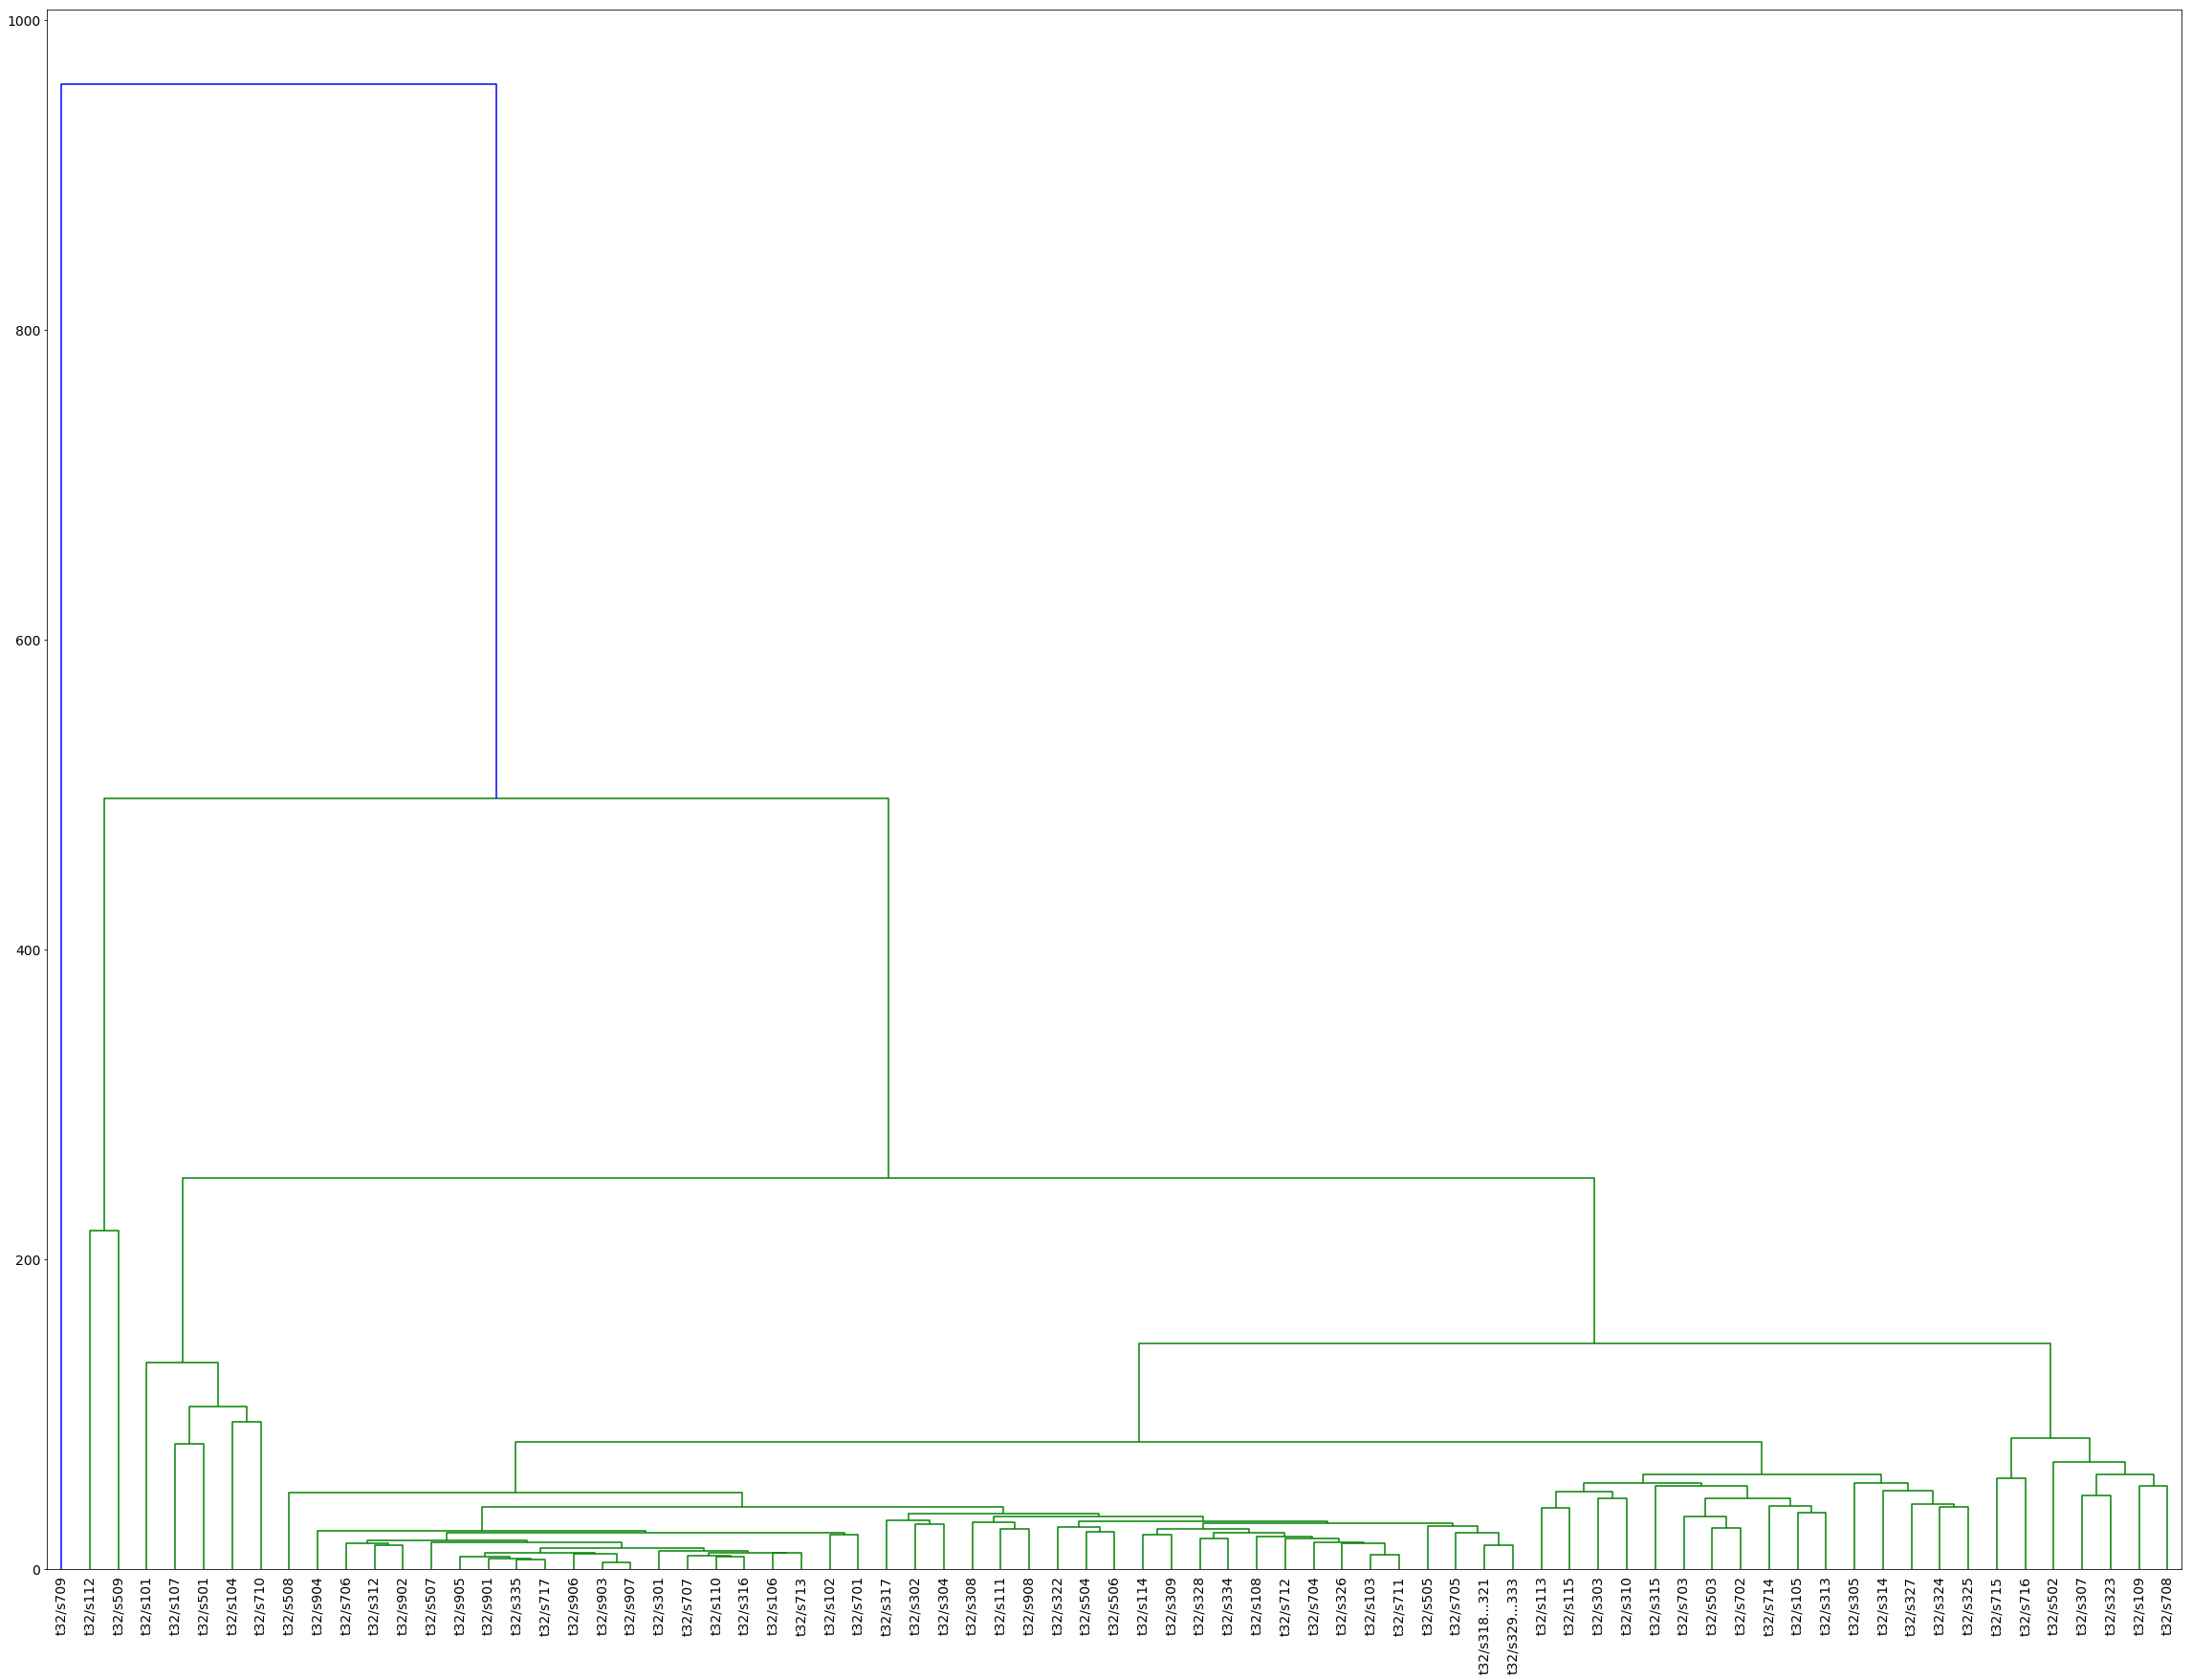

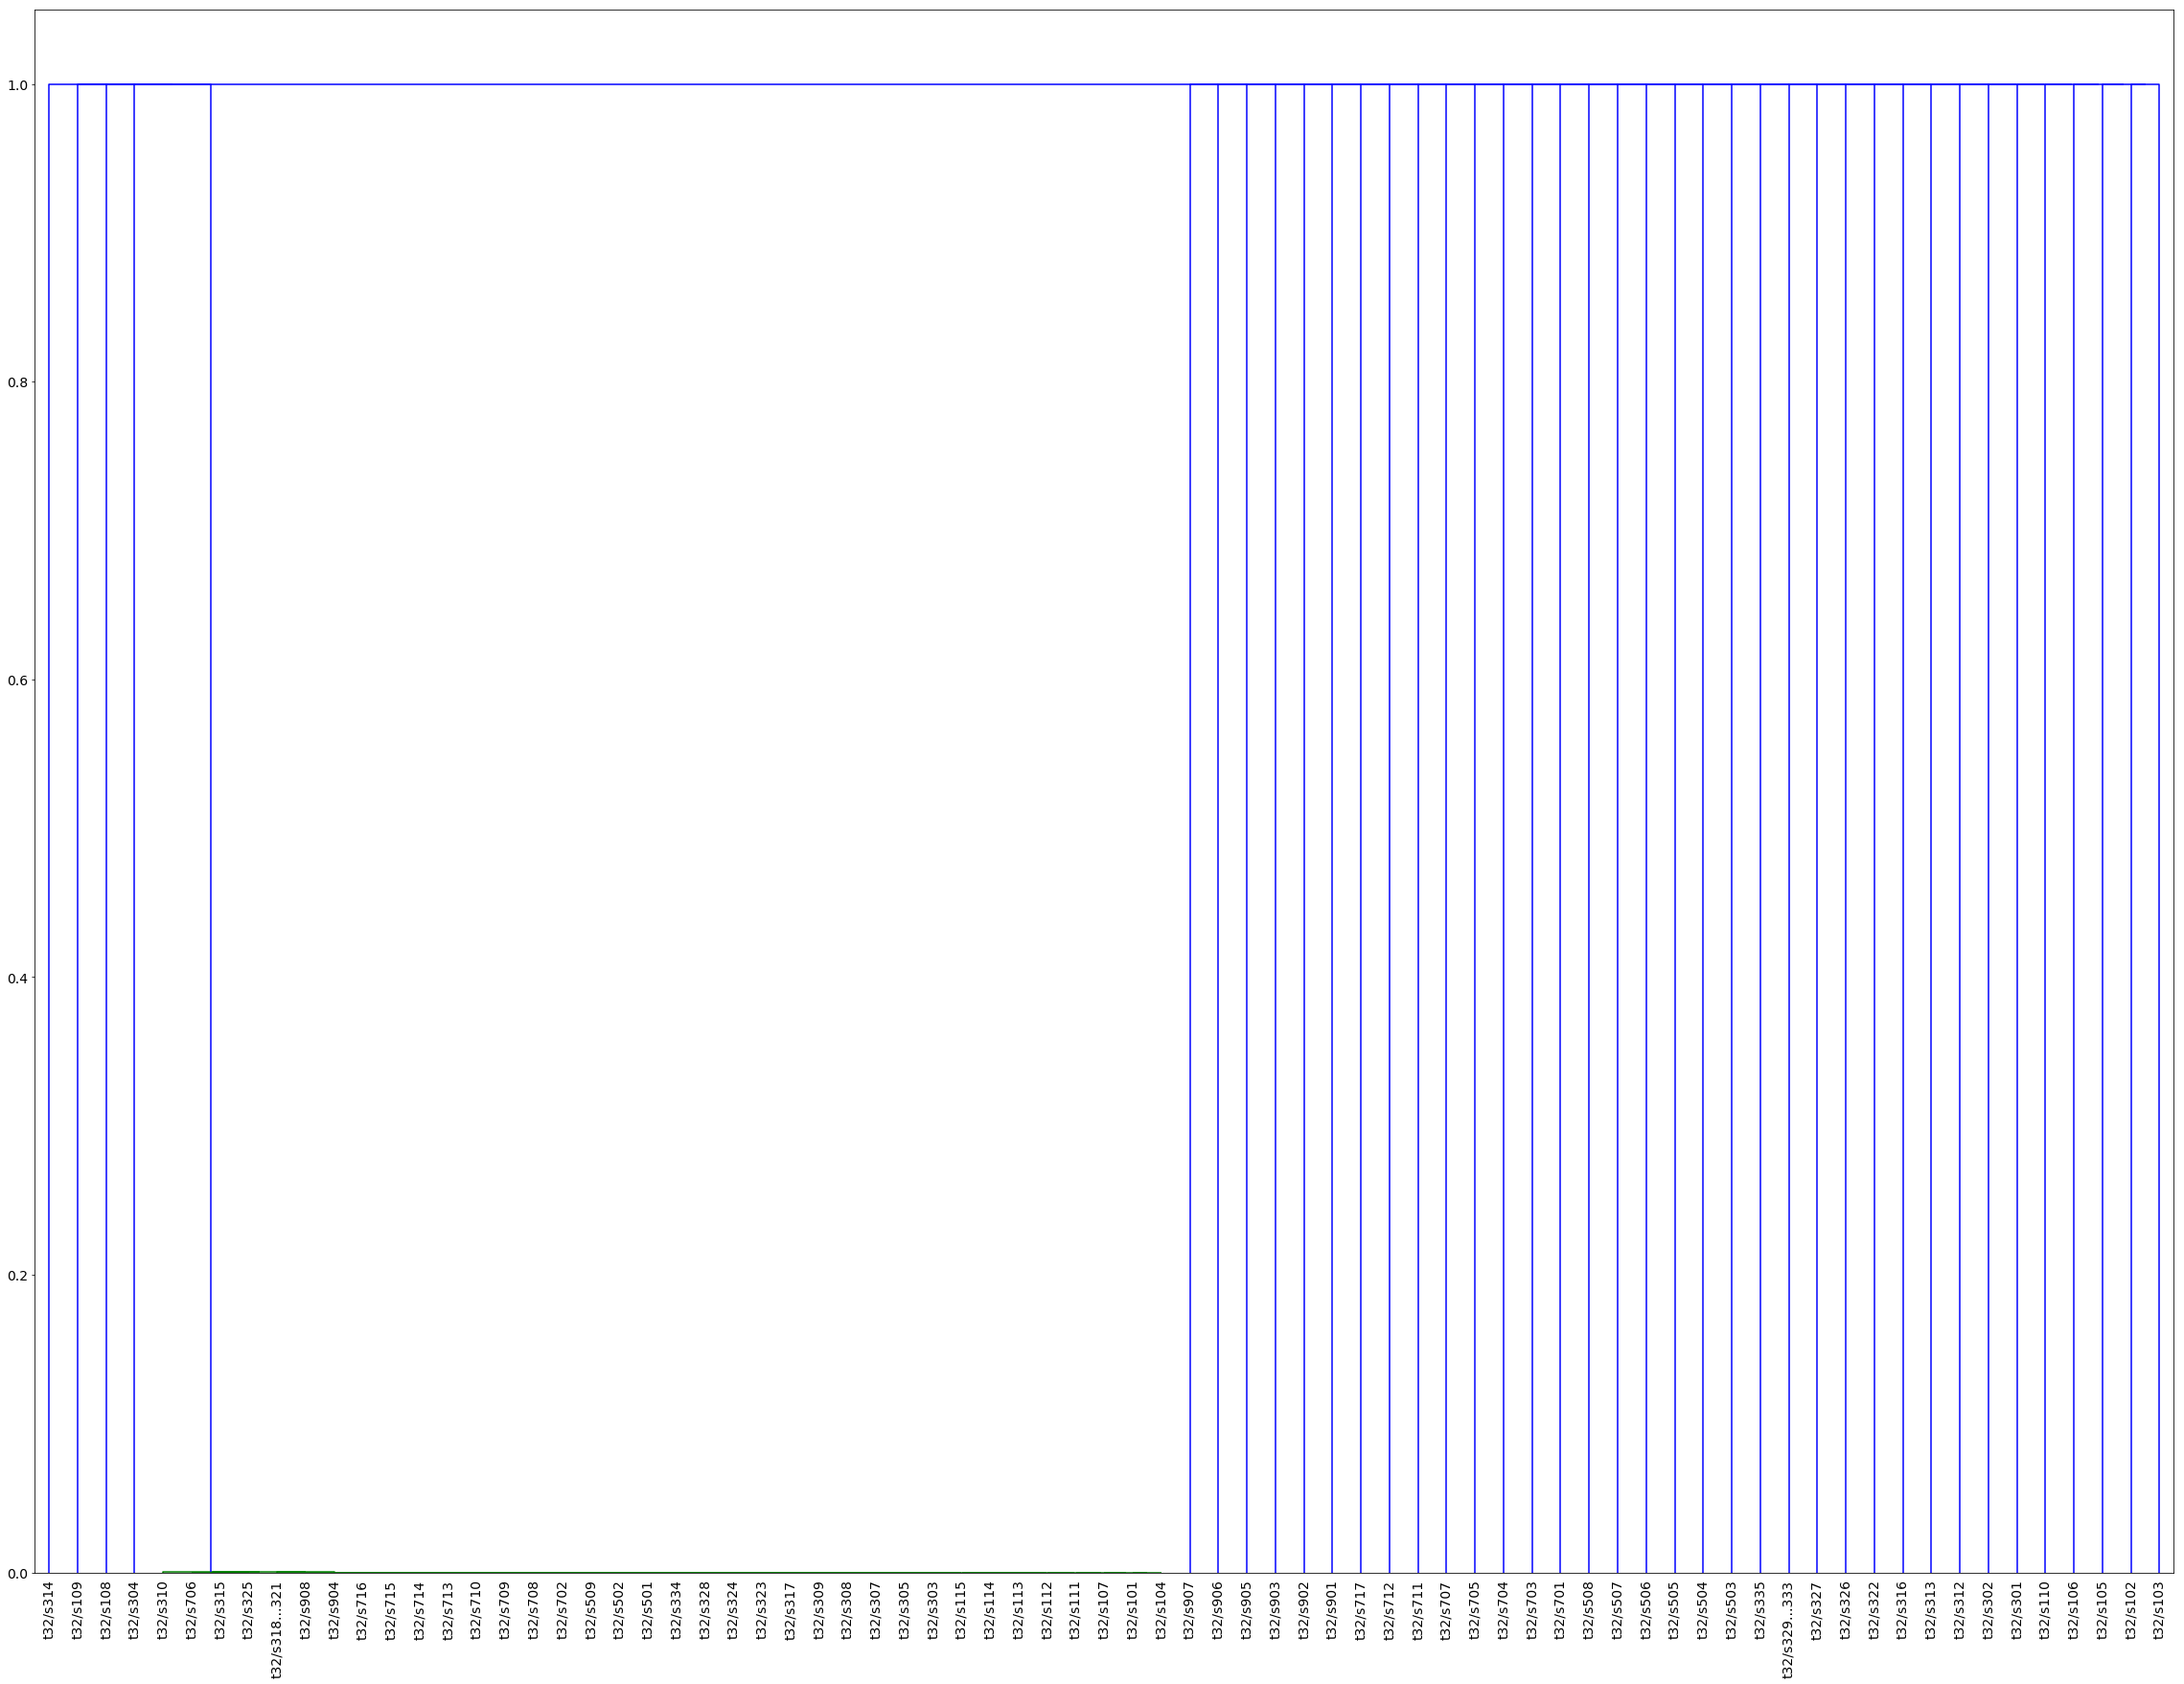

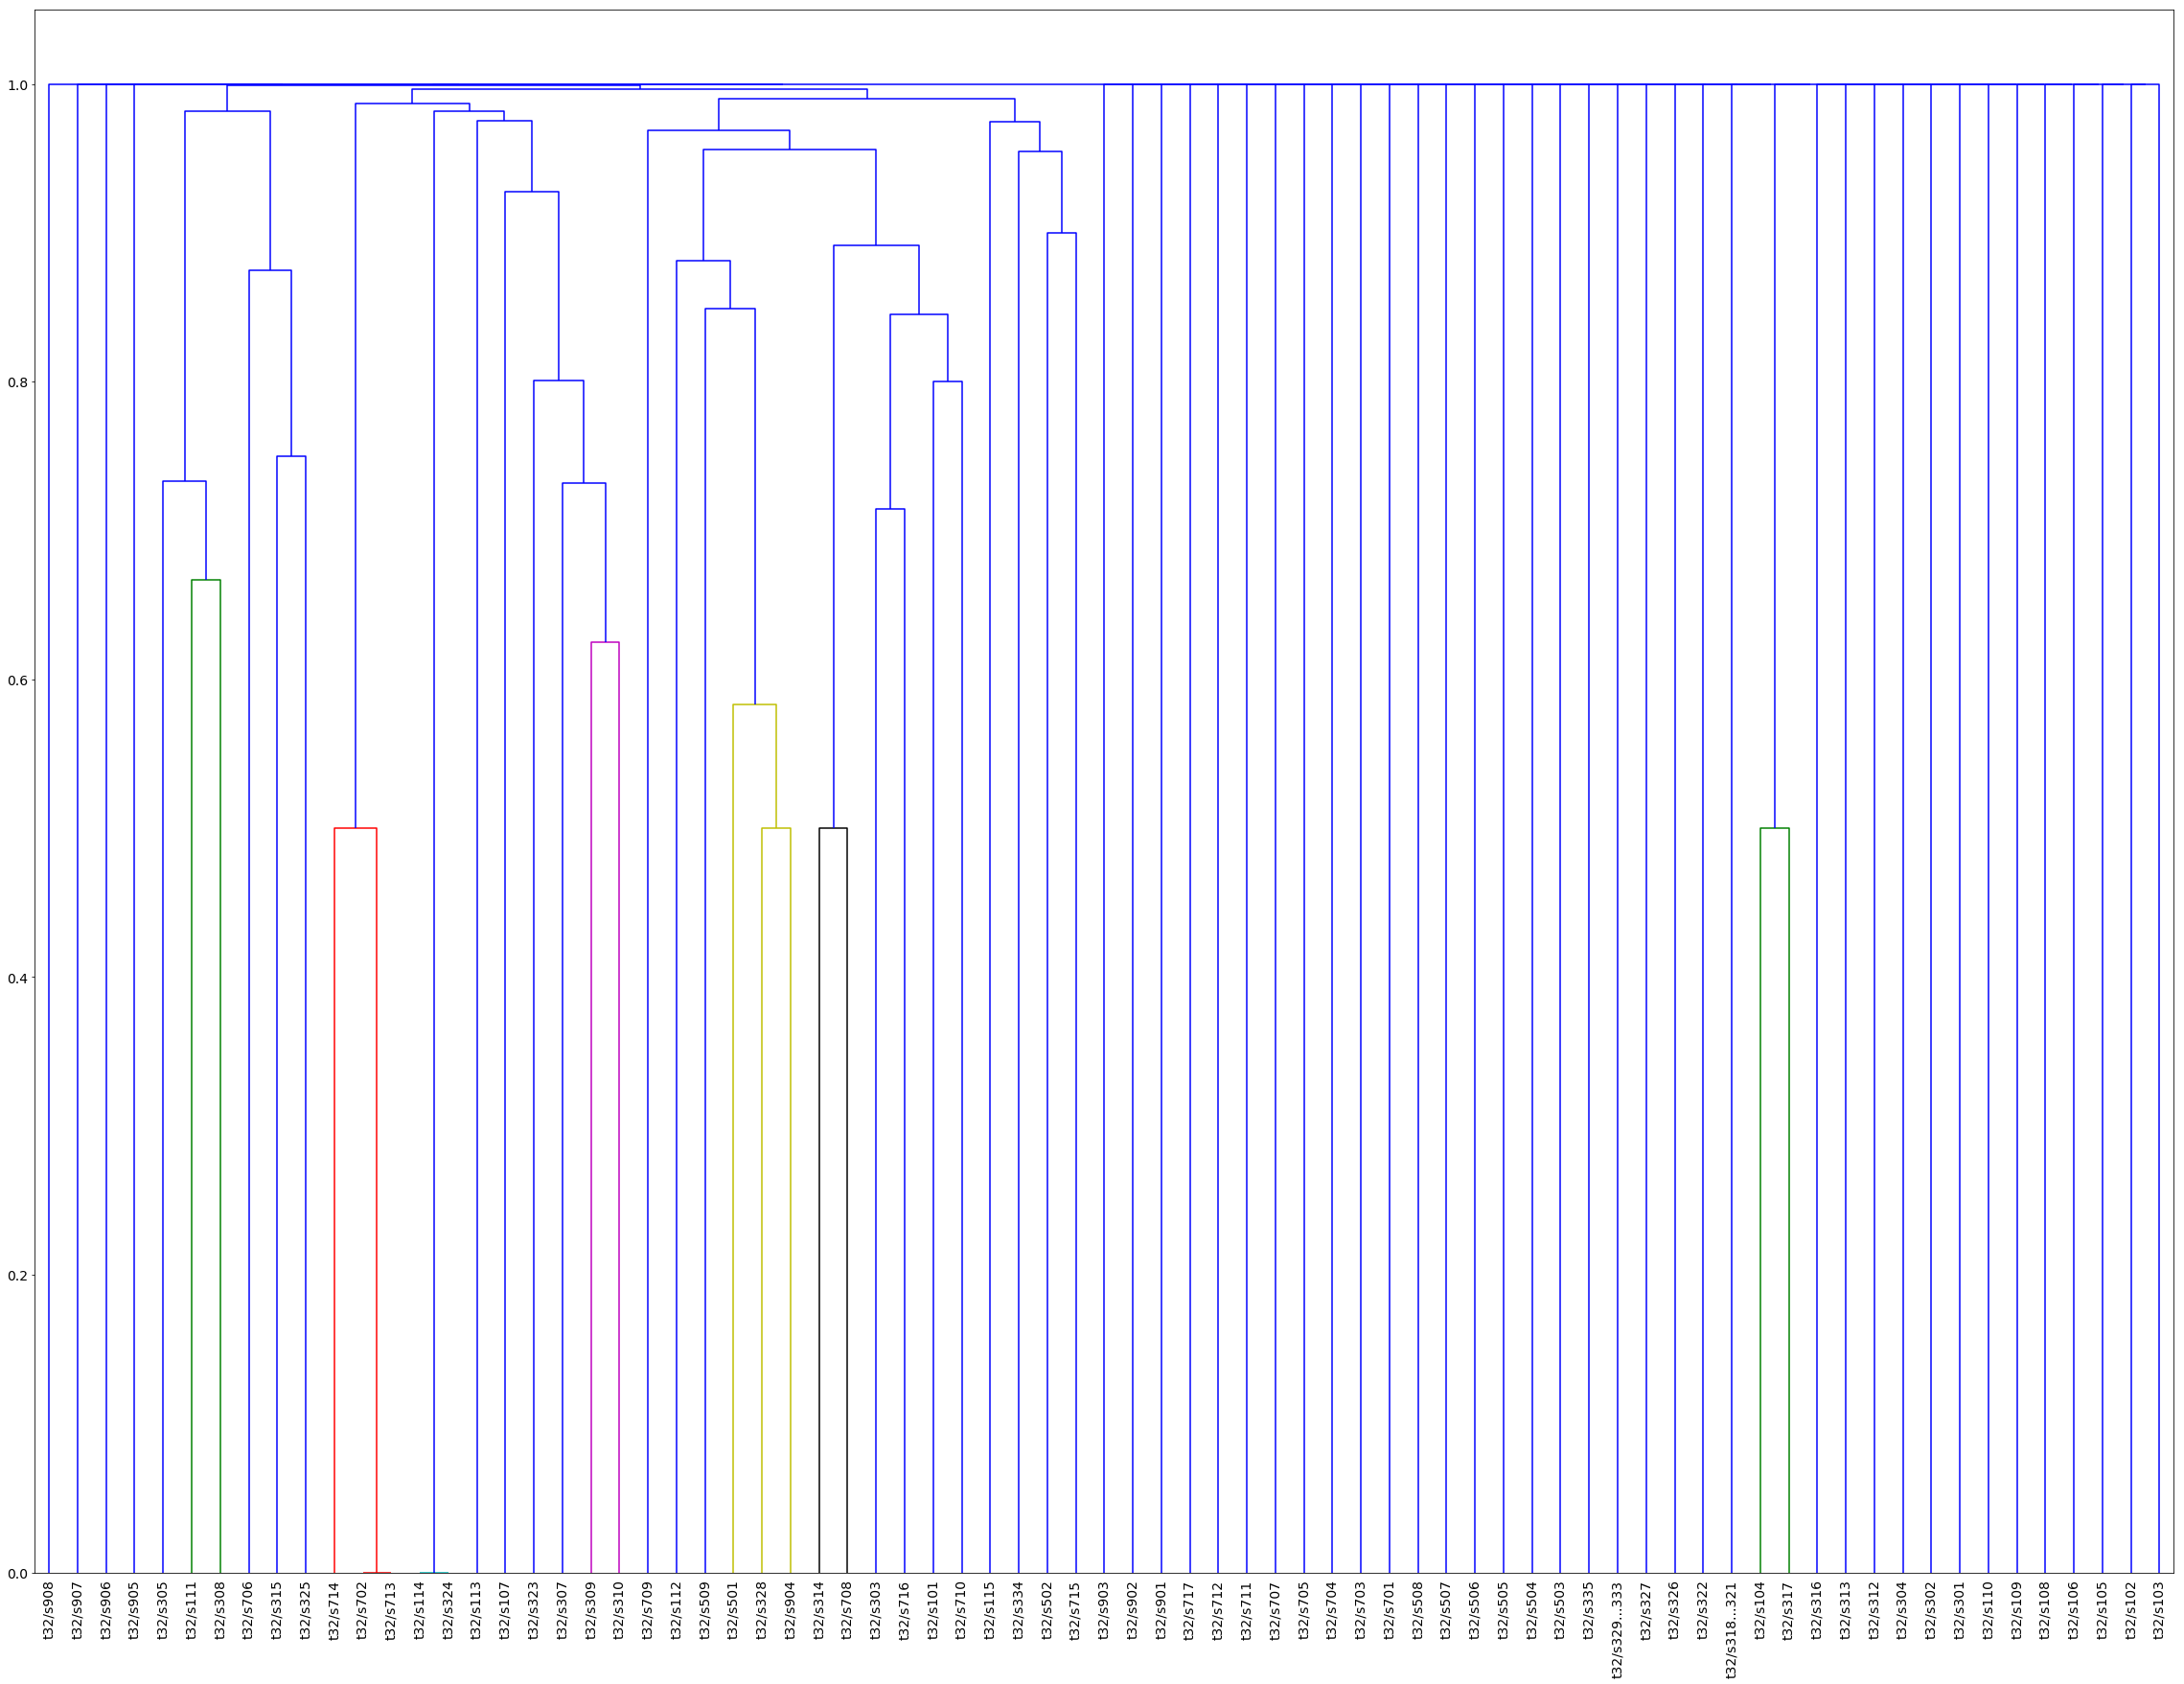

In [62]:
t = 't32'
show_dendrogram(usc.title(t).sections())

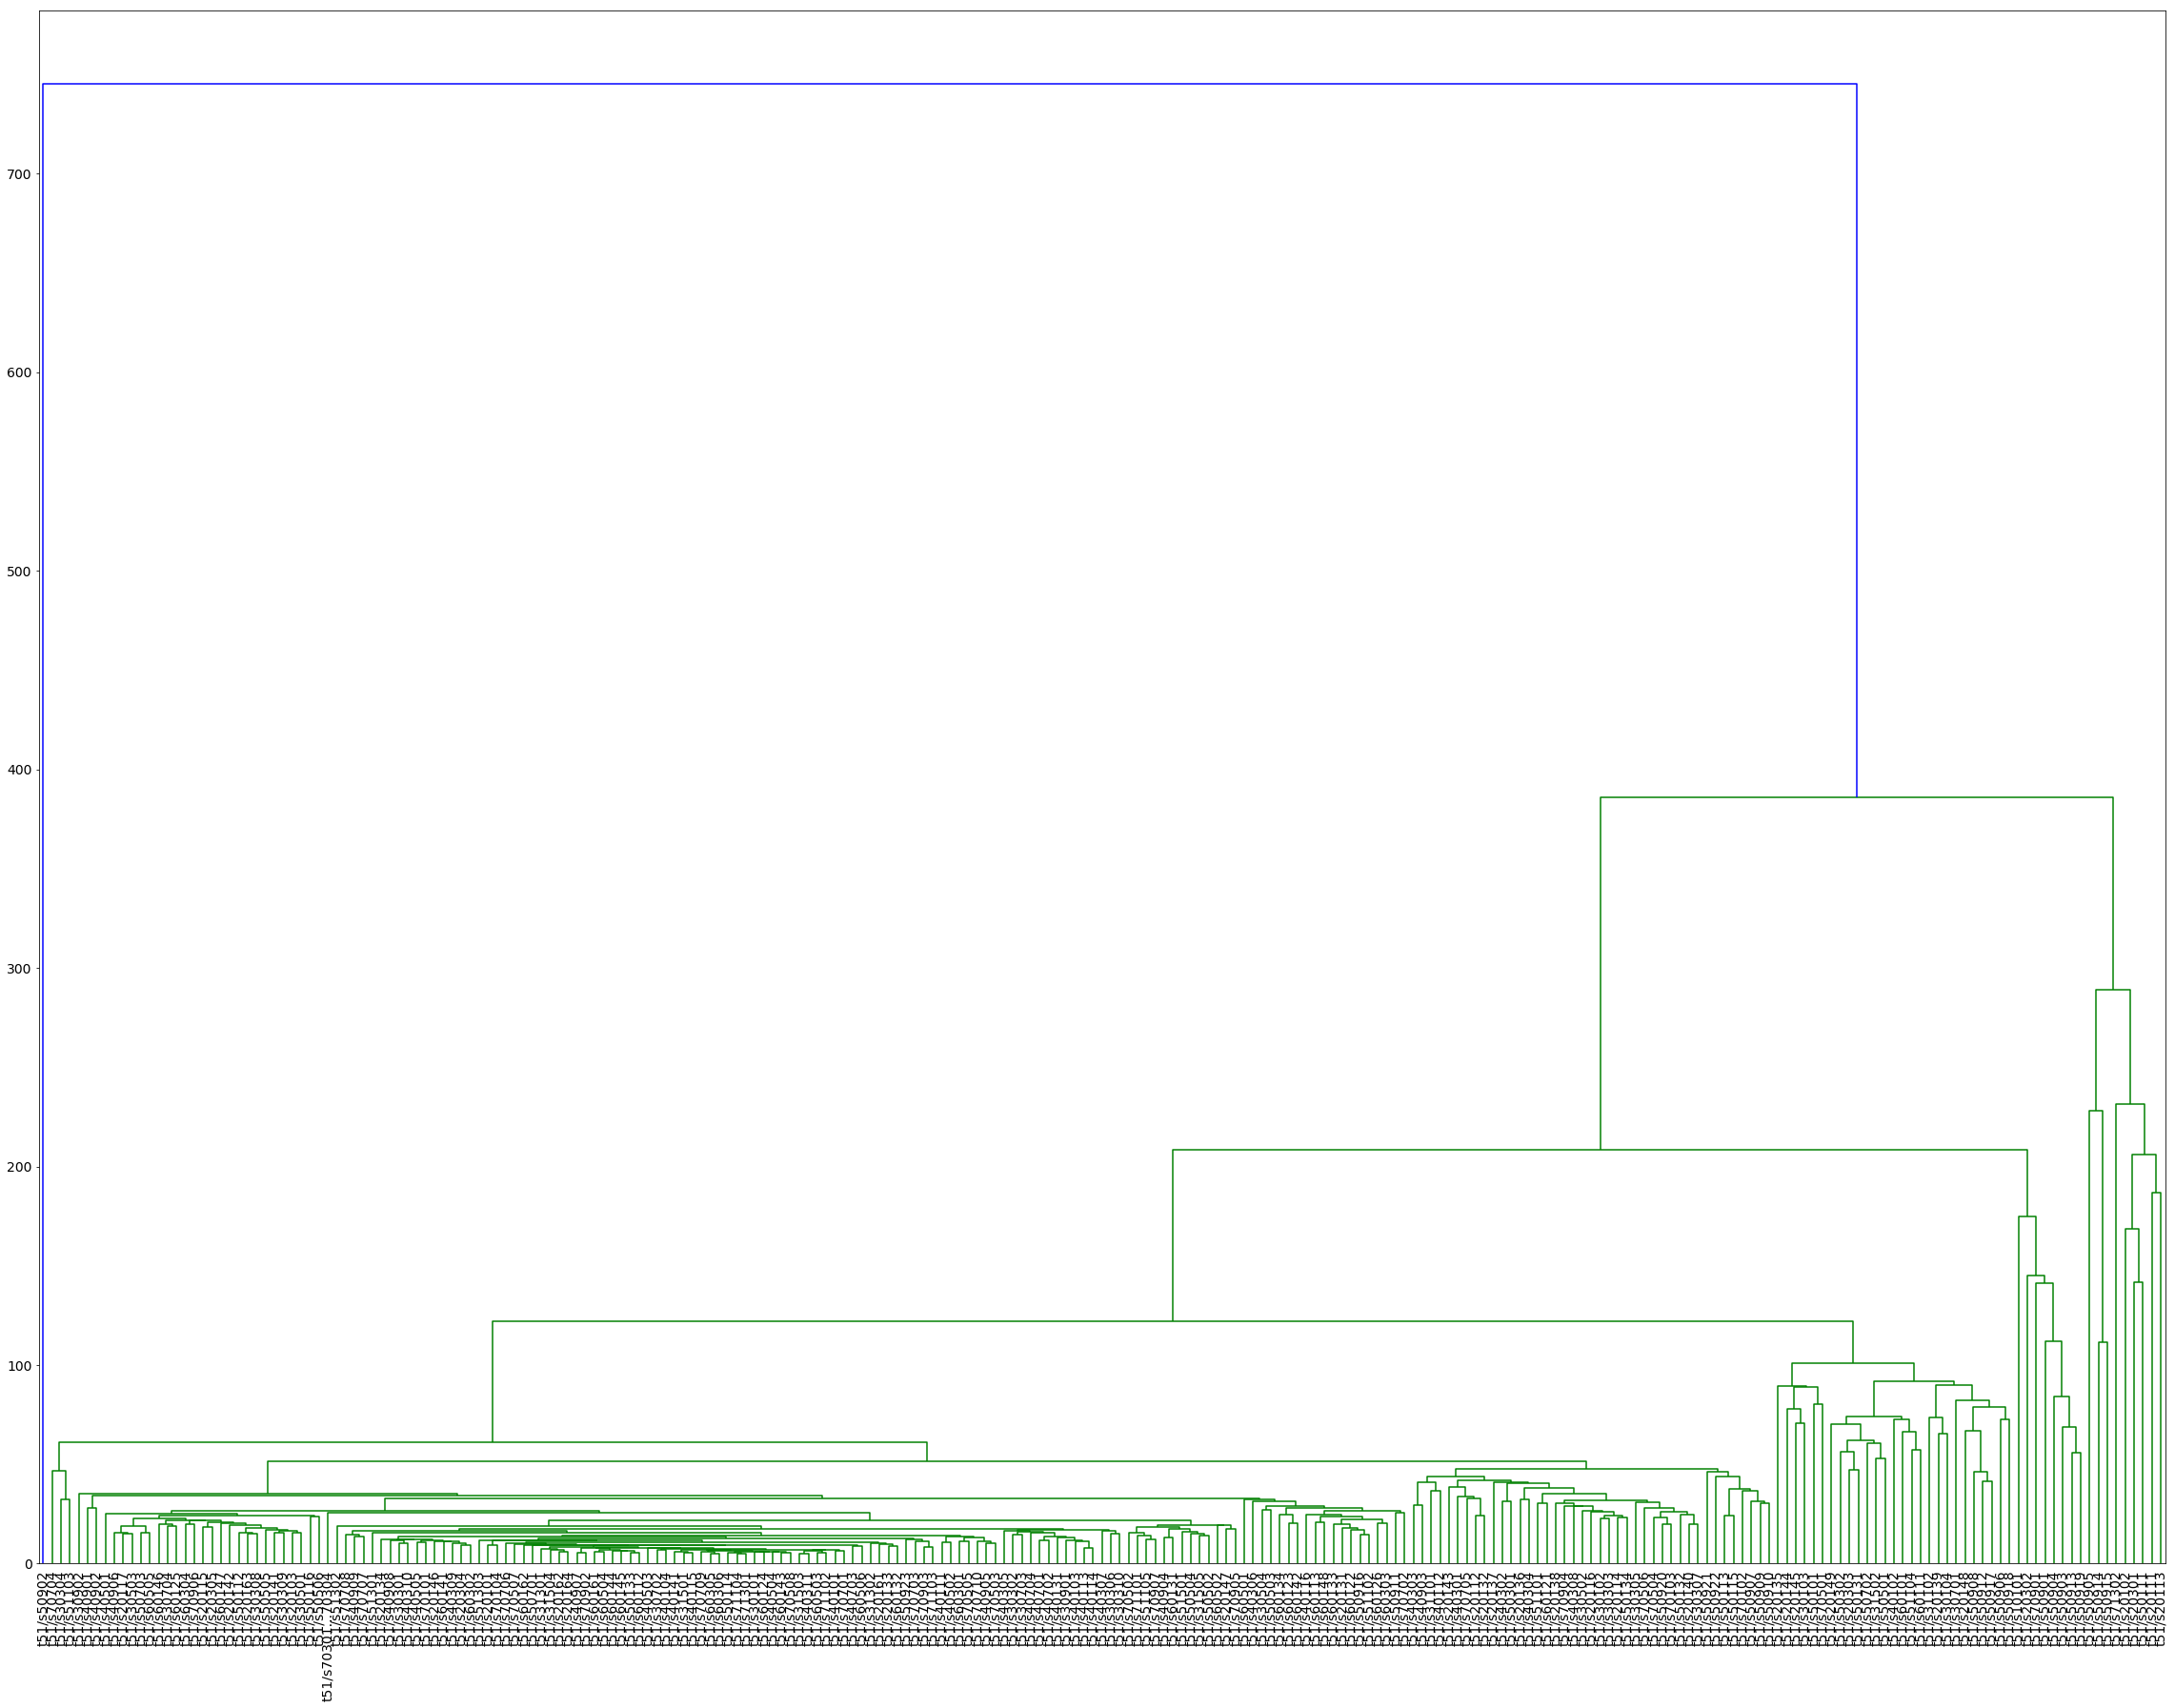

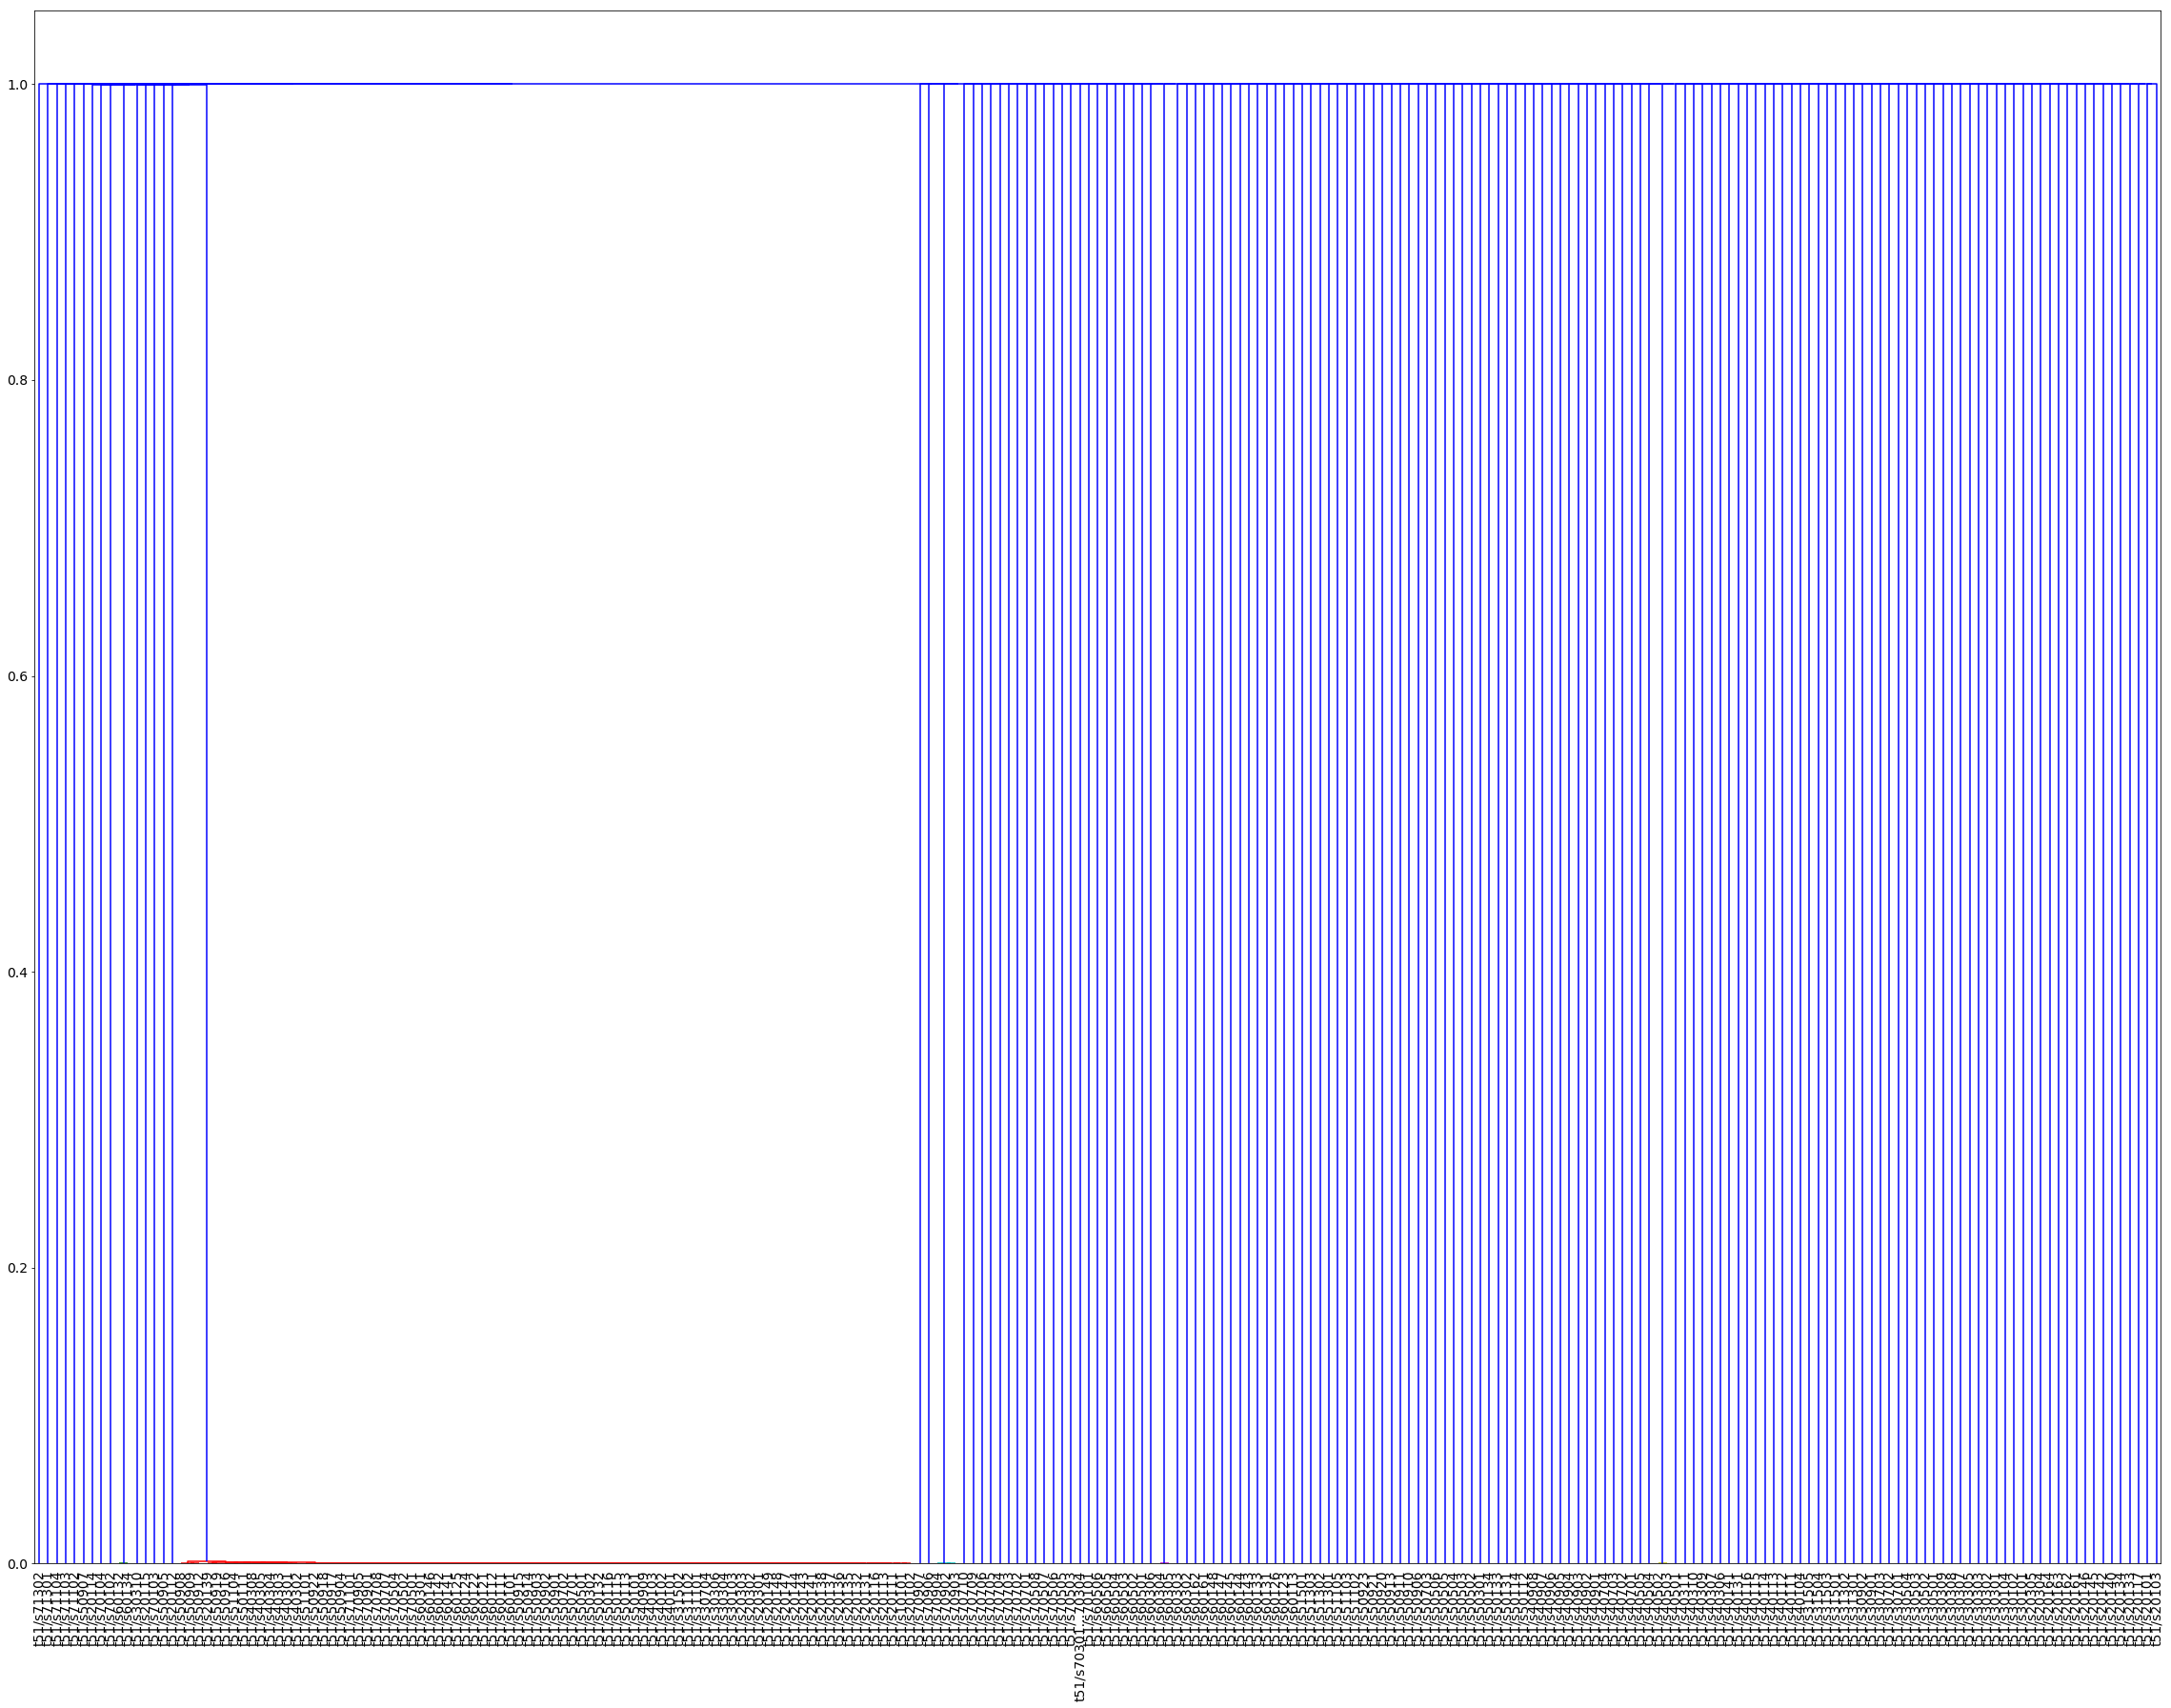

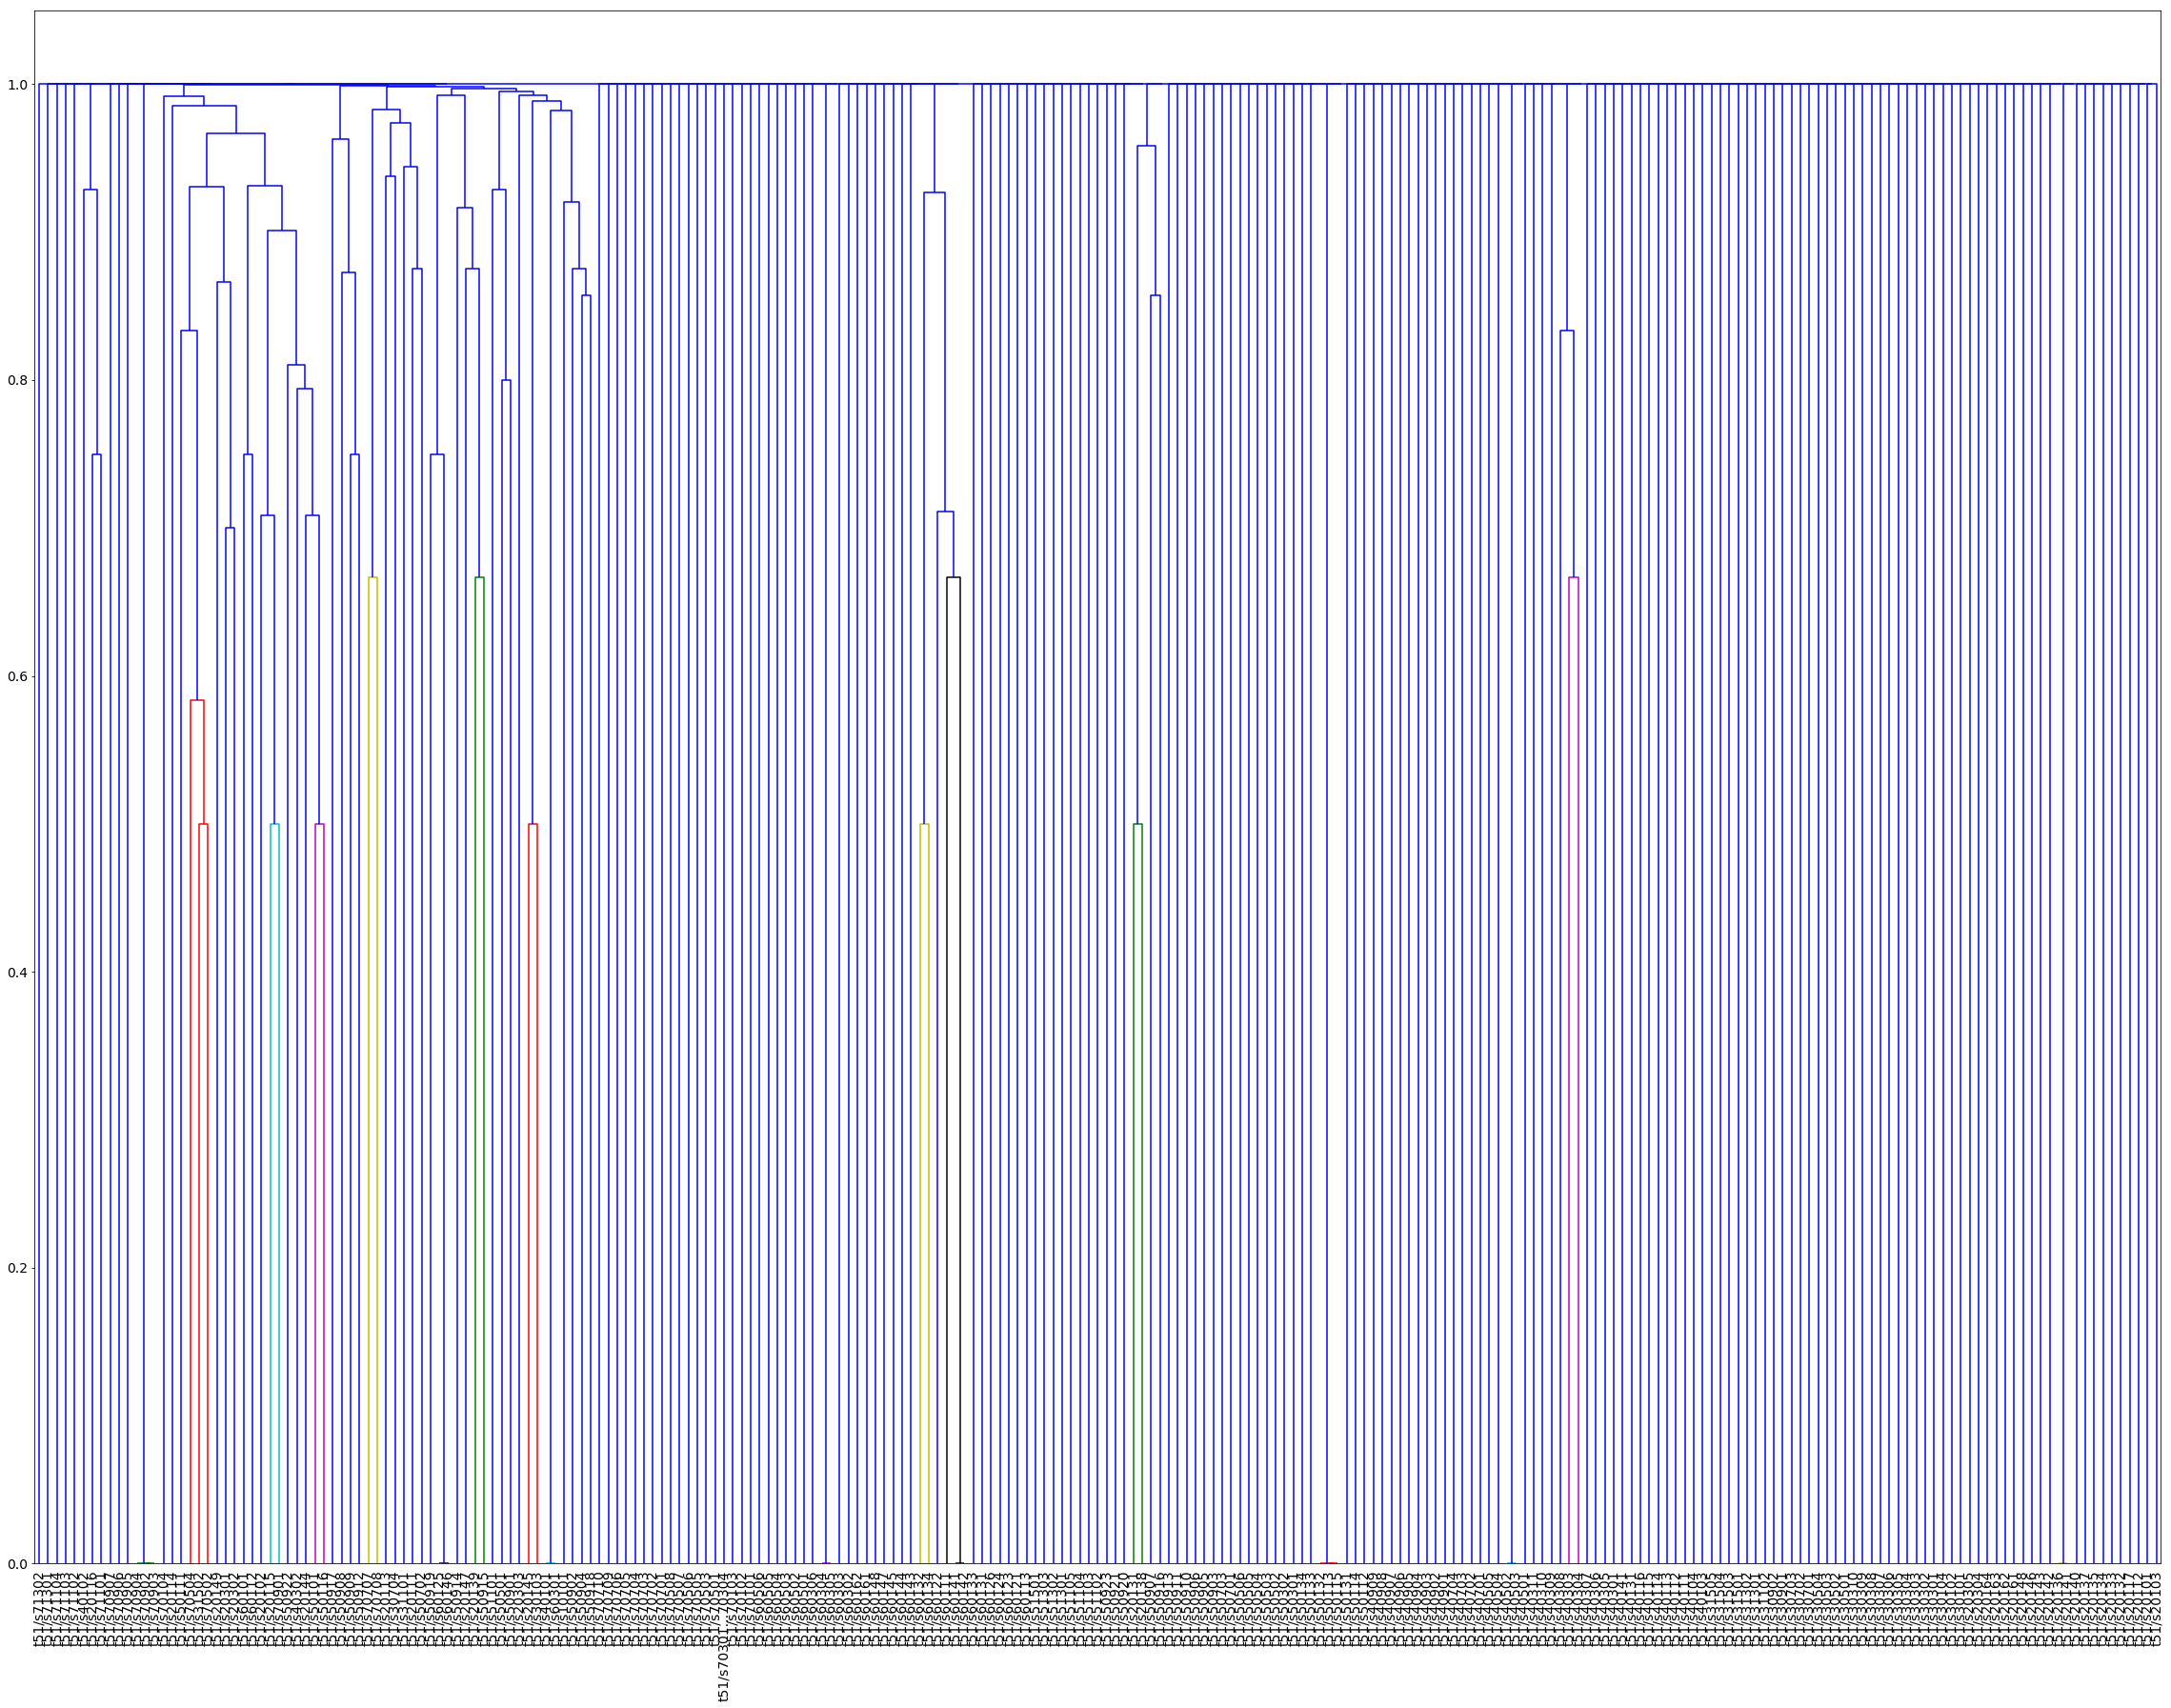

In [63]:
t = 't51'
show_dendrogram(usc.title(t).sections())